In [1]:
from quantumsparse.spin import SpinOperators
from quantumsparse.operator import Symmetry, Operator
from quantumsparse.spin.shift import shift, shift_foundamental
from quantumsparse.spin import Heisenberg, Ising
from quantumsparse.spin.functions import rotate_spins
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

plt.style.use('../../notebook.mplstyle')                # use matplotlib style notebook.mplstyle

In [2]:
S     = 1./2. # spin value
Nsites = 4 # number of sites
spin_values = np.full(Nsites,S)

In [3]:
T = shift_foundamental(Nsites)
T

          name: None
  memory (csr): 1024 bytes
 memory (deep): 2797 bytes
          type: float64
         shape: (4, 4)
      sparsity: 0.250000
         # all: 4
         #  on: 0
         # off: 4
    norm (all): 2.000000
    norm  (on): 0.000000
    norm (off): 2.000000
     hermitean: False
     symmetric: False
       unitary: True
     n. blocks: 1
   eigenvalues: computed
   eigenstates: computed

In [ ]:
SpinOps = SpinOperators(spin_values)
spins = SpinOps.Sx, SpinOps.Sy, SpinOps.Sz
Sz = SpinOps.Sx


	computing the spin operators
		input parameters:
		             N spins : 4                                                           
		         spin values : [ 0.500000 , 0.500000 , 0.500000 , 0.500000  ]              
		          dimensions : [ 2 , 2 , 2 , 2  ]                                          


In [5]:
EulerAngles = np.zeros((8,3))
EulerAngles[:,2] = 360 - np.linspace(0,360,8,endpoint=False)
EulerAngles = np.pi * EulerAngles / 180
print("Euler angles (in radians):\n", EulerAngles)

print("Delta Euler angles (in deg):\n", np.diff(EulerAngles,axis=0)*180/np.pi)

St,Sr,Sz= rotate_spins(spins=SpinOps,EulerAngles=EulerAngles)
St[0]

Euler angles (in radians):
 [[0.         0.         6.28318531]
 [0.         0.         5.49778714]
 [0.         0.         4.71238898]
 [0.         0.         3.92699082]
 [0.         0.         3.14159265]
 [0.         0.         2.35619449]
 [0.         0.         1.57079633]
 [0.         0.         0.78539816]]
Delta Euler angles (in deg):
 [[  0.   0. -45.]
 [  0.   0. -45.]
 [  0.   0. -45.]
 [  0.   0. -45.]
 [  0.   0. -45.]
 [  0.   0. -45.]
 [  0.   0. -45.]]


TypeError: cannot unpack non-iterable SpinOperators object

In [27]:
H = Ising(Sz)
H

          name: None
  memory (csr): 1072 bytes
 memory (deep): 1961 bytes
          type: float64
         shape: (16, 16)
      sparsity: 0.250000
         # all: 64
         #  on: 0
         # off: 64
    norm (all): 2.000000
    norm  (on): 0.000000
    norm (off): 2.000000
     hermitean: True
     symmetric: True
       unitary: False
     n. blocks: unknown
   eigenvalues: unknown
   eigenstates: unknown

In [28]:
Sztilde = np.conjugate(T.eigenstates.T) @ Sz

In [51]:
Htilde = 0
for n in range(Nsites):
    partial = Sztilde[n].dagger() @ Sztilde[n] * T.eigenvalues[n]
    # partial.visualize()
    if n > 0:
        print( (old_partial-partial).norm())
    old_partial = partial.copy()
    # Htilde = Htilde + partial

2.0
2.0
2.0


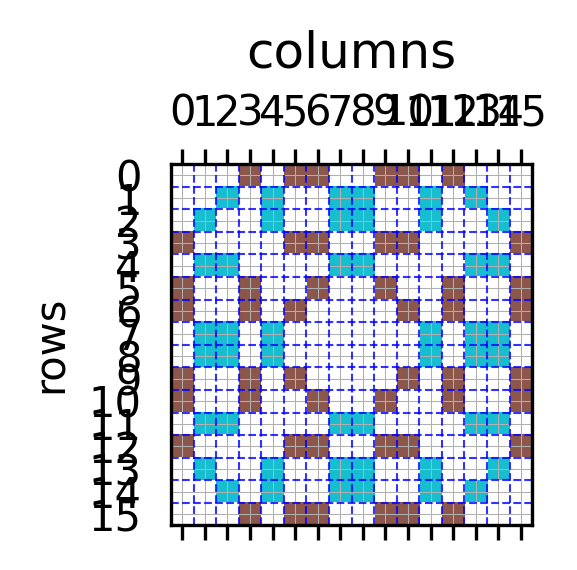

In [53]:
delta = Sztilde[1].dagger() @ Sztilde[1] - Sztilde[0].dagger() @ Sztilde[0]
delta.visualize()

In [30]:
Htilde.count_blocks()

(2, array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int32))

In [31]:
H.count_blocks()

(2, array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int32))

In [33]:
(H - Htilde).norm()

np.float64(5.35556679100884e-16)

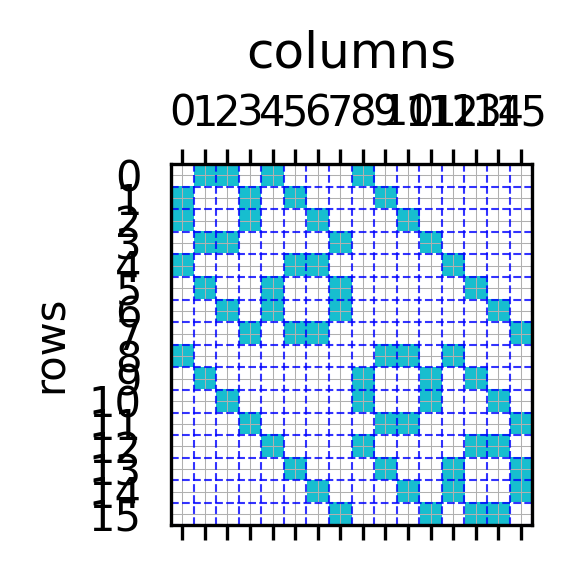

In [46]:
Sztilde[0].visualize()

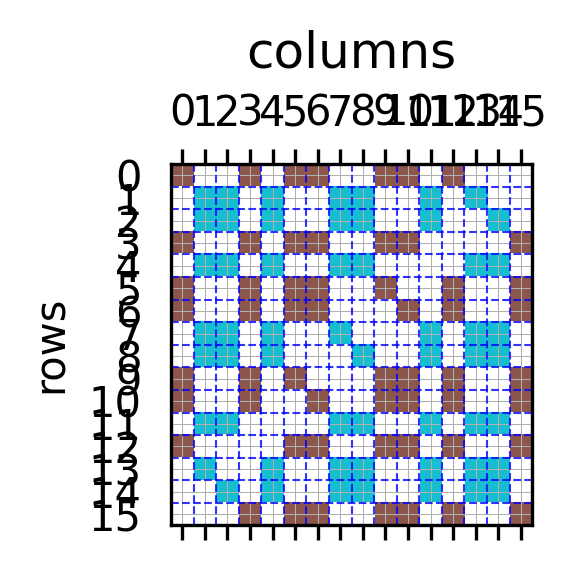

In [36]:
Htilde.visualize()